## Первичное знакомство с датасетом

In [ ]:
import chardet
import pandas as pd

In [ ]:
df = pd.read_csv('POSEIDON.csv', encoding = 'cp850', on_bad_lines='skip')

Сразу удалим ненужную колонку

In [ ]:
df=df.drop(columns=['PubmedID'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Peptide    2094 non-null   object
 1   Cell line  2082 non-null   object
 2   Cargo      2029 non-null   object
 3   Uptake     2095 non-null   object
 4   Units      2059 non-null   object
 5   Conc.      1903 non-null   object
 6   Time       2006 non-null   object
 7   Temp.      1537 non-null   object
 8   Method     2087 non-null   object
 9   Type       2086 non-null   object
 10  Sequence   2091 non-null   object
dtypes: object(11)
memory usage: 180.2+ KB


In [ ]:
import numpy as np

Так как целевая величина содержится в различных методах ее измерения, выбрали только те, что отражают один и тот же метод с одной величиной:

In [ ]:
sp = ['Mean Fluorescence (% of positive control TAT as 100 %)',
'Mean Fluorescence intensity' ,
'Median Fluorescence intensity' ,
'Fluorescence intensity' ,
'Intracellular Fluorescence' ,
'Fluorescence (fold/basal)' ,
'Geo Mean Fluorescence intensity' ,
'Mean Fluorescence intensity/cell' ,
'Median Normalized Fluorescence' ,
'Normalized Mean Fluorescence intensity' ,
'Hoechst fluorescence intensity' ,
'Microscopic fluorescence intensity' ,
'FITC Mean Intensity' ,
'Mean value of cellular uptake' ,
'corr. Fluorescence' ,
'Intensity']
s = []
for i in df['Units']:
  if i in sp:
    s.append(i)
  else:
    s.append(np.nan)

In [ ]:
df['Units'] = s

<ipython-input-231-b0b486500566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Units'] = s


In [ ]:
df = df.dropna(subset='Units')

In [ ]:
df

,Peptide,Cell line,Cargo,Uptake,Units,Conc.,Time,Temp.,Method,Type,Sequence
0,Tat (49-57),Jurkat cells,Fluorescein,650.00,Mean Fluorescence intensity,12.5,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR
1,Tat (49-56),Jurkat cells,Fluorescein,31.25,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR
2,Tat (49-55),Jurkat cells,Fluorescein,10.00,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR
3,Tat (50-57),Jurkat cells,Fluorescein,22.50,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR
4,Tat (51-57),Jurkat cells,Fluorescein,20.00,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...
2090,Oleyl-R2-(HR)4,MDA-MB-231 cells,siRNA-A490,100.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRHRHRHRHR
2091,Oleyl-R3-(HR)4,MDA-MB-231 cells,siRNA-A491,250.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRHRHRHRHR
2092,Oleyl-R4-(HR)4,MDA-MB-231 cells,siRNA-A492,400.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRHRHRHRHR
2093,Oleyl-R5-(HR)4,MDA-MB-231 cells,siRNA-A493,500.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRRHRHRHRHR


Удалим из датасета непонятные символы

In [ ]:
def uptake(v):
  if '/' in v:
    v = np.nan
    return v
  elif '▒' in v:
    e = v.index('▒')
    v = v[:e]
  v = float(str(v).replace(' ', ''))
  return v

In [ ]:
df['Uptake'] = df['Uptake'].apply(uptake)

In [ ]:
df['Uptake'] = df['Uptake'].astype(float)

Приведем время к единой величине в минутах

In [ ]:
def time(v):
  if type(v) != float:
    v = v.replace(' min.', '').replace(' min', '').replace('min', '')
    if ' hour' in v:
      v = v.replace(' hour', '')
      v = float(v) * 60
    elif ' h' in v:
      v = v.replace(' h', '')
      v = float(v) * 60
    elif 'h' in v:
      v = v.replace('h', '')
      v = float(v) * 60
    elif 's' in v:
      v = v.replace('s', '')
      v = float(v) / 60
  return v


In [ ]:
df['Time'] = df['Time'].apply(time)

In [ ]:
df['Time'] = df['Time'].astype(float)

Сохраним только численные данные в колонке с температурой

In [ ]:
# Удаляем знак градуса и 'C' из колонки 'температура'
df['Temp.'] = df['Temp.'].str.replace('║C', '')
df['Temp.'] = df['Temp.'].astype(float)
df

,Peptide,Cell line,Cargo,Uptake,Units,Conc.,Time,Temp.,Method,Type,Sequence
0,Tat (49-57),Jurkat cells,Fluorescein,650.00,Mean Fluorescence intensity,12.5 uM,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR
1,Tat (49-56),Jurkat cells,Fluorescein,31.25,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR
2,Tat (49-55),Jurkat cells,Fluorescein,10.00,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR
3,Tat (50-57),Jurkat cells,Fluorescein,22.50,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR
4,Tat (51-57),Jurkat cells,Fluorescein,20.00,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...
2090,Oleyl-R2-(HR)4,MDA-MB-231 cells,siRNA-A490,100.00,Mean Fluorescence intensity,50nM,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRHRHRHRHR
2091,Oleyl-R3-(HR)4,MDA-MB-231 cells,siRNA-A491,250.00,Mean Fluorescence intensity,50nM,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRHRHRHRHR
2092,Oleyl-R4-(HR)4,MDA-MB-231 cells,siRNA-A492,400.00,Mean Fluorescence intensity,50nM,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRHRHRHRHR
2093,Oleyl-R5-(HR)4,MDA-MB-231 cells,siRNA-A493,500.00,Mean Fluorescence intensity,50nM,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRRHRHRHRHR


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 0 to 2094
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Peptide    954 non-null    object 
 1   Cell line  955 non-null    object 
 2   Cargo      944 non-null    object 
 3   Uptake     952 non-null    float64
 4   Units      955 non-null    object 
 5   Conc.      874 non-null    object 
 6   Time       919 non-null    float64
 7   Temp.      729 non-null    float64
 8   Method     955 non-null    object 
 9   Type       955 non-null    object 
 10  Sequence   954 non-null    object 
dtypes: float64(3), object(8)
memory usage: 89.5+ KB


И заполним пропуски температуры модой

In [ ]:
df['Temp.'].fillna(df['Temp.'].mode()[0], inplace=True)

<ipython-input-209-b769e3ccb43e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temp.'].fillna(df['Temp.'].mode()[0], inplace=True)


Займемся концентрацией

In [ ]:
print(set(list(df['Conc.'])))

{'6 uM', '100 mg/L', '30uM', '0.05 umol', '25 uM', '7uM', '5ug/ml', 'Charge ratio = 10', '50 uM', '25uM', '40 ug /mL', '25ug/ml', '0.002ug/mL', '10uM', '9.0 uM', '16 uM', '50uM', '0.01uM', '16uM', '10 uM', nan, '8 uM', '0.1ug/ml', '1 umol', '0.5 uM', 'Charge ratio = 0.5 / Charge ratio 5', '0.1uM', '600 ug/ml', 'Final Concentration between 1/5 uM', 'Equal to a DOX dose of 10 ug/mL', 'N/P ratio 20', '8 uM MCoTI-II / 16 uM SFTI-1', '40 uM', '5 uM', '5 ug', '20 uM', '3.9mg/ml', '5uM', '100 uM', '6ug/mL', '100uM', '10ug', '2.5uM', '3uM', '1 uM', '1.5 ug/mL lipossomes', '40uM', '13 uM', '57 umol/L', '50nM', '100 nM', '2uM', '20 ug/ml', '25ug/mL', '12ug/mL', '15uM', '4 uM CPP', '1 nM', '7.5uM', '300 uM', '4 uM', '100 nM siRNA', '1.25uM', '1600 uM', '6uM', '100ug', '12.5 uM', '2 uM', '1uM', '4uM', '10 ug/ml', '20uM', '2.5 uM', '3 uM', '10 ug/mL'}


In [ ]:
# Удаляем строки, которые не содержат нужной нам размерности концентрации, поскольку для ее перевода нет необходимых данных
df = df[df['Conc.'].str.contains('uM|nM|umol/L',na=False)]

# Выводим обновленный дата-сет
df

,Peptide,Cell line,Cargo,Uptake,Units,Conc.,Time,Temp.,Method,Type,Sequence
0,Tat (49-57),Jurkat cells,Fluorescein,650.00,Mean Fluorescence intensity,12.5 uM,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR
1,Tat (49-56),Jurkat cells,Fluorescein,31.25,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR
2,Tat (49-55),Jurkat cells,Fluorescein,10.00,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR
3,Tat (50-57),Jurkat cells,Fluorescein,22.50,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR
4,Tat (51-57),Jurkat cells,Fluorescein,20.00,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...
2090,Oleyl-R2-(HR)4,MDA-MB-231 cells,siRNA-A490,100.00,Mean Fluorescence intensity,50nM,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRHRHRHRHR
2091,Oleyl-R3-(HR)4,MDA-MB-231 cells,siRNA-A491,250.00,Mean Fluorescence intensity,50nM,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRHRHRHRHR
2092,Oleyl-R4-(HR)4,MDA-MB-231 cells,siRNA-A492,400.00,Mean Fluorescence intensity,50nM,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRHRHRHRHR
2093,Oleyl-R5-(HR)4,MDA-MB-231 cells,siRNA-A493,500.00,Mean Fluorescence intensity,50nM,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRRHRHRHRHR


In [ ]:
# Добавляем пробел перед 'nM'
df['Conc.'] = df['Conc.'].str.replace('nM', ' nM', regex=False)

def convert_nM(value):
    if 'nM' in value:
        number = float(value.split()[0])  # Извлекаем числовое значение
        return f"{number * 1000}uM"  # Умножаем на 1000 и добавляем 'uM'
    return value

# Применяем функцию к колонке 'концентрация'
df['Conc.'] = df['Conc.'].apply(convert_nM)

<ipython-input-203-d8aed245c3a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conc.'] = df['Conc.'].str.replace('nM', ' nM', regex=False)
<ipython-input-203-d8aed245c3a9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conc.'] = df['Conc.'].apply(convert_nM)


In [ ]:
df['Conc.']

0         12.5 uM
1         12.5 uM
2         12.5 uM
3         12.5 uM
4         12.5 uM
          ...    
2090    50000.0uM
2091    50000.0uM
2092    50000.0uM
2093    50000.0uM
2094        2.5uM
Name: Conc., Length: 741, dtype: object

In [ ]:
# Удаляем обозначение концентраций из колонки
df['Conc.'] = df['Conc.'].str.replace(' uM', '')
df['Conc.'] = df['Conc.'].str.replace('uM', '')
df['Conc.'] = df['Conc.'].str.replace(' umol/L', '')


<ipython-input-205-2f996aedb7ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conc.'] = df['Conc.'].str.replace(' uM', '')
<ipython-input-205-2f996aedb7ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conc.'] = df['Conc.'].str.replace('uM', '')
<ipython-input-205-2f996aedb7ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
df = df[pd.to_numeric(df['Conc.'], errors='coerce').notnull()]

In [ ]:
df['Conc.'] = df['Conc.'].astype(float)
df

<ipython-input-212-0eee43797e87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conc.'] = df['Conc.'].astype(float)


,Peptide,Cell line,Cargo,Uptake,Units,Conc.,Time,Temp.,Method,Type,Sequence
0,Tat (49-57),Jurkat cells,Fluorescein,650.00,Mean Fluorescence intensity,12.5,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR
1,Tat (49-56),Jurkat cells,Fluorescein,31.25,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR
2,Tat (49-55),Jurkat cells,Fluorescein,10.00,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR
3,Tat (50-57),Jurkat cells,Fluorescein,22.50,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR
4,Tat (51-57),Jurkat cells,Fluorescein,20.00,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...
2090,Oleyl-R2-(HR)4,MDA-MB-231 cells,siRNA-A490,100.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRHRHRHRHR
2091,Oleyl-R3-(HR)4,MDA-MB-231 cells,siRNA-A491,250.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRHRHRHRHR
2092,Oleyl-R4-(HR)4,MDA-MB-231 cells,siRNA-A492,400.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRHRHRHRHR
2093,Oleyl-R5-(HR)4,MDA-MB-231 cells,siRNA-A493,500.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRRHRHRHRHR


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 0 to 2094
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Peptide    723 non-null    object 
 1   Cell line  723 non-null    object 
 2   Cargo      717 non-null    object 
 3   Uptake     723 non-null    float64
 4   Units      723 non-null    object 
 5   Conc.      723 non-null    float64
 6   Time       718 non-null    float64
 7   Temp.      723 non-null    float64
 8   Method     723 non-null    object 
 9   Type       723 non-null    object 
 10  Sequence   723 non-null    object 
dtypes: float64(4), object(7)
memory usage: 67.8+ KB


In [ ]:
df

,Peptide,Cell line,Cargo,Uptake,Units,Conc.,Time,Temp.,Method,Type,Sequence
0,Tat (49-57),Jurkat cells,Fluorescein,650.00,Mean Fluorescence intensity,12.5,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR
1,Tat (49-56),Jurkat cells,Fluorescein,31.25,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR
2,Tat (49-55),Jurkat cells,Fluorescein,10.00,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR
3,Tat (50-57),Jurkat cells,Fluorescein,22.50,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR
4,Tat (51-57),Jurkat cells,Fluorescein,20.00,Mean Fluorescence intensity,12.5,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...
2090,Oleyl-R2-(HR)4,MDA-MB-231 cells,siRNA-A490,100.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRHRHRHRHR
2091,Oleyl-R3-(HR)4,MDA-MB-231 cells,siRNA-A491,250.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRHRHRHRHR
2092,Oleyl-R4-(HR)4,MDA-MB-231 cells,siRNA-A492,400.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRHRHRHRHR
2093,Oleyl-R5-(HR)4,MDA-MB-231 cells,siRNA-A493,500.00,Mean Fluorescence intensity,50000.0,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRRHRHRHRHR


In [ ]:
df = df.dropna(subset=['Conc.', 'Temp.', 'Time', 'Uptake', 'Sequence'])

In [ ]:
del df['Type']

In [ ]:
df = df.reset_index()

работаем с дескрипторами

In [ ]:
!pip3 install peptides

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.4/115.4 kB 2.9 MB/s eta 0:00:00


In [ ]:
import peptides

In [349]:
seqs = df['Sequence']
sp = []
for s in seqs:
   desq = peptides.Peptide(s).descriptors()
   h = peptides.Peptide(s).hydrophobicity(scale="Aboderin")
   e = peptides.Peptide(s).isoelectric_point(pKscale="EMBOSS")
   mw = peptides.Peptide(s).molecular_weight()
   inst = round(peptides.Peptide(s).instability_index(), 2)
   desq['Sequence'] = s
   desq['Hydro'] = h
   desq['Electro'] = e
   desq['Weight'] = mw

   sp.append(desq)

df_ = pd.DataFrame(sp)

In [350]:
df_

,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,BLOSUM10,...,VHSE8,Z1,Z2,Z3,Z4,Z5,Sequence,Hydro,Electro,Weight
0,1.047778,0.151111,-0.847778,-0.675556,1.091111,0.146667,0.437778,0.171111,-0.064444,-0.461111,...,0.536667,3.050000,1.920000,-3.046667,1.508889,0.028889,RKKRRQRRR,1.777778,13.203100,1339.61914
1,1.052500,0.146250,-0.846250,-0.683750,1.067500,0.140000,0.410000,0.170000,-0.045000,-0.453750,...,0.500000,2.991250,1.847500,-2.990000,1.448750,0.053750,RKKRRQRR,1.750000,13.107420,1183.43164
2,1.058571,0.140000,-0.844286,-0.694286,1.037143,0.131429,0.374286,0.168571,-0.020000,-0.444286,...,0.452857,2.915714,1.754286,-2.917143,1.371429,0.085714,RKKRRQR,1.714286,12.984698,1027.24414
3,1.052500,0.146250,-0.846250,-0.683750,1.067500,0.140000,0.410000,0.170000,-0.045000,-0.453750,...,0.500000,2.991250,1.847500,-2.990000,1.448750,0.053750,KKRRQRRR,1.750000,13.107420,1183.43164
4,1.040000,0.172857,-0.852857,-0.660000,1.102857,0.145714,0.438571,0.175714,-0.077143,-0.397143,...,0.552857,3.091429,1.984286,-3.061429,1.442857,0.017143,KRRQRRR,1.814286,13.104760,1055.25754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.894000,0.734000,-0.836000,0.254000,0.908000,-0.196000,0.660000,0.076000,-0.208000,0.084000,...,0.758000,3.100000,2.280000,-1.996000,2.754000,-0.066000,RRHRHRHRHR,1.840000,13.198984,1503.70464
714,0.904545,0.684545,-0.838182,0.175455,0.941818,-0.160000,0.660000,0.085455,-0.209091,0.029091,...,0.764545,3.138182,2.300000,-2.132727,2.684545,-0.075455,RRRHRHRHRHR,1.854545,13.278162,1659.89214
715,0.913333,0.643333,-0.840000,0.110000,0.970000,-0.130000,0.660000,0.093333,-0.210000,-0.016667,...,0.770000,3.170000,2.316667,-2.246667,2.626667,-0.083333,RRRRHRHRHRHR,1.866667,13.345107,1816.07964
716,0.920769,0.608462,-0.841538,0.054615,0.993846,-0.104615,0.660000,0.100000,-0.210769,-0.055385,...,0.774615,3.196923,2.330769,-2.343077,2.577692,-0.090000,RRRRRHRHRHRHR,1.876923,13.403098,1972.26714


In [351]:
df_concat = pd.concat([df, df_], axis=1)

In [352]:
df_concat

,index,Uptake,Conc.,Time,Temp.,Sequence,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,...,VHSE8,Z1,Z2,Z3,Z4,Z5,Sequence,Hydro,Electro,Weight
0,0,650.00,12.5,15.0,23.0,RKKRRQRRR,1.047778,0.151111,-0.847778,-0.675556,...,0.536667,3.050000,1.920000,-3.046667,1.508889,0.028889,RKKRRQRRR,1.777778,13.203100,1339.61914
1,1,31.25,12.5,10.0,23.0,RKKRRQRR,1.052500,0.146250,-0.846250,-0.683750,...,0.500000,2.991250,1.847500,-2.990000,1.448750,0.053750,RKKRRQRR,1.750000,13.107420,1183.43164
2,2,10.00,12.5,10.0,23.0,RKKRRQR,1.058571,0.140000,-0.844286,-0.694286,...,0.452857,2.915714,1.754286,-2.917143,1.371429,0.085714,RKKRRQR,1.714286,12.984698,1027.24414
3,3,22.50,12.5,10.0,23.0,KKRRQRRR,1.052500,0.146250,-0.846250,-0.683750,...,0.500000,2.991250,1.847500,-2.990000,1.448750,0.053750,KKRRQRRR,1.750000,13.107420,1183.43164
4,4,20.00,12.5,10.0,23.0,KRRQRRR,1.040000,0.172857,-0.852857,-0.660000,...,0.552857,3.091429,1.984286,-3.061429,1.442857,0.017143,KRRQRRR,1.814286,13.104760,1055.25754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2090,100.00,50000.0,1440.0,37.0,RRHRHRHRHR,0.894000,0.734000,-0.836000,0.254000,...,0.758000,3.100000,2.280000,-1.996000,2.754000,-0.066000,RRHRHRHRHR,1.840000,13.198984,1503.70464
714,2091,250.00,50000.0,1440.0,37.0,RRRHRHRHRHR,0.904545,0.684545,-0.838182,0.175455,...,0.764545,3.138182,2.300000,-2.132727,2.684545,-0.075455,RRRHRHRHRHR,1.854545,13.278162,1659.89214
715,2092,400.00,50000.0,1440.0,37.0,RRRRHRHRHRHR,0.913333,0.643333,-0.840000,0.110000,...,0.770000,3.170000,2.316667,-2.246667,2.626667,-0.083333,RRRRHRHRHRHR,1.866667,13.345107,1816.07964
716,2093,500.00,50000.0,1440.0,37.0,RRRRRHRHRHRHR,0.920769,0.608462,-0.841538,0.054615,...,0.774615,3.196923,2.330769,-2.343077,2.577692,-0.090000,RRRRRHRHRHRHR,1.876923,13.403098,1972.26714


In [353]:
del df_concat['index']

In [354]:
med = df_concat['Conc.'].median()
Q1, Q3 = df_concat['Conc.'].quantile([0.25, 0.75])
IQR = Q3 - Q1

# Задание надёжных границ с использованием IQR
n, v = med - 1.5 * IQR, med + 1.5 * IQR

# Отсеивание на основе заданных границ
df_concat_c = df_concat[(df_concat['Conc.'] >= n) & (df_concat['Conc.'] <= v)]

In [355]:
med = df_concat_c['Uptake'].median()
Q1, Q3 = df_concat_c['Uptake'].quantile([0.25, 0.75])
IQR = Q3 - Q1

# Задание надёжных границ с использованием IQR
n, v = med - 1.5 * IQR, med + 1.5 * IQR

# Отсеивание на основе заданных границ
df_concat_fin = df_concat_c[(df_concat_c['Uptake'] >= n) & (df_concat_c['Uptake'] <= v)]

In [356]:
len(df_concat_fin)

454

Корреляция

In [357]:
columns = 'Sequence'
dfcorr = df_concat_fin.drop(columns, axis=1)

In [359]:
correlation_matrix = dfcorr[['Uptake', 'Hydro', 'Electro', 'Weight']].corr()

In [360]:
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Uptake,Hydro,Electro,Weight
Uptake,1.000000,-0.102231,-0.061733,-0.021956
Hydro,-0.102231,1.000000,0.085197,0.442881
Electro,-0.061733,0.085197,1.000000,0.018692
Weight,-0.021956,0.442881,0.018692,1.000000


In [376]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns
colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']
fig = make_subplots(rows=1, cols=2, subplot_titles=['Распределение Uptake', 'Violin Plot Uptake'])

# Гистограмма
hist_fig = px.histogram(df_concat_fin, x="Uptake", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) # Добавление графика с указанием расположения

# Violin plot
violin_fig = px.violin(df_concat_fin, y="Uptake", color_discrete_sequence = colors, box = True)
fig.add_trace(violin_fig['data'][0], row=1, col=2) # Добавление графика с указанием расположения

# Настройка макета
fig.update_layout(showlegend=False, title_text="Гистограмма и Violin Plot")

# Отображение графика
fig.show()

In [338]:
corr = dfcorr.corr()
corr.style.background_gradient(cmap='coolwarm')

In [364]:
corr_matrix = dfcorr.corr()
print(corr_matrix["Uptake"].sort_values(ascending=False))

Uptake     1.000000
ST3        0.371113
SVGER2     0.288451
Time       0.285201
E4         0.275143
             ...   
ProtFP7   -0.198861
SVGER11   -0.220120
F4        -0.276112
F5        -0.276579
Z5        -0.356369
Name: Uptake, Length: 95, dtype: float64


In [365]:
df_del_descr = corr_matrix[abs(corr_matrix['Uptake']) <0.2]
max(df_del_descr['Uptake'])

0.1919453029931647

In [366]:
df_del_descr.axes[0].tolist()

['Conc.',
 'Temp.',
 'BLOSUM1',
 'BLOSUM2',
 'BLOSUM3',
 'BLOSUM4',
 'BLOSUM5',
 'BLOSUM6',
 'BLOSUM7',
 'BLOSUM8',
 'BLOSUM9',
 'BLOSUM10',
 'PP1',
 'PP2',
 'PP3',
 'F1',
 'F2',
 'F3',
 'F6',
 'KF1',
 'KF2',
 'KF3',
 'KF4',
 'KF5',
 'KF6',
 'KF7',
 'KF8',
 'KF9',
 'MSWHIM1',
 'MSWHIM2',
 'MSWHIM3',
 'E1',
 'E2',
 'E3',
 'E5',
 'PD1',
 'PD2',
 'ProtFP2',
 'ProtFP3',
 'ProtFP4',
 'ProtFP5',
 'ProtFP6',
 'ProtFP7',
 'ProtFP8',
 'SV1',
 'SV2',
 'SV4',
 'ST1',
 'ST2',
 'ST4',
 'ST5',
 'ST6',
 'ST7',
 'ST8',
 'SVGER1',
 'SVGER3',
 'SVGER4',
 'SVGER5',
 'SVGER6',
 'SVGER7',
 'SVGER8',
 'SVGER9',
 'SVGER10',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'VHSE1',
 'VHSE2',
 'VHSE3',
 'VHSE4',
 'VHSE5',
 'VHSE6',
 'VHSE7',
 'VHSE8',
 'Z1',
 'Z2',
 'Z3',
 'Hydro',
 'Electro',
 'Weight']

In [368]:
columns_to_drop = ['Conc.',
 'Temp.',
 'BLOSUM1',
 'BLOSUM2',
 'BLOSUM3',
 'BLOSUM4',
 'BLOSUM5',
 'BLOSUM6',
 'BLOSUM7',
 'BLOSUM8',
 'BLOSUM9',
 'BLOSUM10',
 'PP1',
 'PP2',
 'PP3',
 'F1',
 'F2',
 'F3',
 'F6',
 'KF1',
 'KF2',
 'KF3',
 'KF4',
 'KF5',
 'KF6',
 'KF7',
 'KF8',
 'KF9',
 'MSWHIM1',
 'MSWHIM2',
 'MSWHIM3',
 'E1',
 'E2',
 'E3',
 'E5',
 'PD1',
 'PD2',
 'ProtFP2',
 'ProtFP3',
 'ProtFP4',
 'ProtFP5',
 'ProtFP6',
 'ProtFP7',
 'ProtFP8',
 'SV1',
 'SV2',
 'SV4',
 'ST1',
 'ST2',
 'ST4',
 'ST5',
 'ST6',
 'ST7',
 'ST8',
 'SVGER1',
 'SVGER3',
 'SVGER4',
 'SVGER5',
 'SVGER6',
 'SVGER7',
 'SVGER8',
 'SVGER9',
 'SVGER10',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'VHSE1',
 'VHSE2',
 'VHSE3',
 'VHSE4',
 'VHSE5',
 'VHSE6',
 'VHSE7',
 'VHSE8',
 'Z1',
 'Z2',
 'Z3',
 'Hydro',
 'Electro']
df_fin = df_concat.drop(columns=columns_to_drop)
df_fin.isna().sum()

Uptake      0
Time        0
Sequence    0
F4          0
F5          0
KF10        0
E4          0
ProtFP1     0
SV3         0
ST3         0
SVGER2      0
SVGER11     0
Z4          0
Z5          0
Sequence    0
Weight      0
dtype: int64

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.0 MB/s eta 0:00:00


In [343]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
import joblib
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
X = df_fin.drop(columns=['Sequence', 'Uptake'])

In [370]:
y = df_fin['Uptake']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [371]:
from catboost import CatBoostRegressor

# Initialize the CatBoostRegressor with RMSE as the loss function
model = CatBoostRegressor(loss_function='RMSE')

# Fit the model on the training data with verbose logging every 100 iterations
model.fit(X_train, y_train, verbose=100)

Learning rate set to 0.037505
0:	learn: 63875.3716096	total: 2.78ms	remaining: 2.78s
100:	learn: 43012.8309182	total: 194ms	remaining: 1.72s
200:	learn: 39254.6468221	total: 408ms	remaining: 1.62s
300:	learn: 38053.4366610	total: 596ms	remaining: 1.38s
400:	learn: 37094.2568374	total: 792ms	remaining: 1.18s
500:	learn: 36556.9064562	total: 995ms	remaining: 991ms
600:	learn: 36248.5535916	total: 1.19s	remaining: 789ms
700:	learn: 36073.0178595	total: 1.39s	remaining: 593ms
800:	learn: 35977.4063923	total: 1.58s	remaining: 393ms
900:	learn: 35904.7431027	total: 1.77s	remaining: 195ms
999:	learn: 35865.3669024	total: 1.97s	remaining: 0us


In [377]:
from sklearn.metrics import mean_squared_error as mse

# Generate predictions on the training and validation sets using the trained 'model'
y_pred = model.predict(X_test)

# Calculate and print the Root Mean Squared Error (RMSE) for training and validation sets
print("Test RMSE: ", np.sqrt(mse(y_pred, y_test)))

Test RMSE:  0.0


In [347]:
y_pred

array([-1.13885551e+03, -5.88055894e+02,  1.14263126e+03,  1.50105810e+04,
        4.60497451e+05,  1.65197771e+03,  2.59433857e+03,  2.74621290e+02,
        1.76918454e+03,  6.76600244e+02,  2.30997293e+04, -6.95632201e+02,
        5.40343749e+02,  7.25406728e+02,  1.69834145e+03,  5.77872256e+02,
        1.03494331e+04,  3.17374170e+01,  4.58556645e+02, -7.73958323e+02,
        3.58888413e+03,  4.25507449e+03,  3.68534382e+03,  1.03163161e+03,
        8.94290828e+00,  3.67023955e+04,  1.97211580e+03,  2.98781971e+03,
        3.26409430e+02,  1.61473293e+03,  1.97844705e+03,  5.17016638e+02,
        7.60409902e+01,  2.73108486e+03,  6.24727279e+03,  5.05617767e+02,
        6.69454463e+03,  8.71393512e+02,  1.18527487e+04,  6.87581002e+03,
        1.64382259e+03,  1.06890937e+04,  7.70602685e+04,  1.71628749e+03,
        5.00618989e+04,  3.93797584e+03,  6.23557598e+02,  8.71393512e+02,
        8.83321355e+03,  8.58571038e+01,  1.78889169e+03,  4.44521856e+03,
        7.71764056e+02,  

In [319]:
y_test

120        80.000
331        12.000
39       1741.000
637     10000.000
514    200000.000
          ...    
132         4.375
292         0.550
41       2044.000
108       440.000
264        11.200
Name: Uptake, Length: 144, dtype: float64

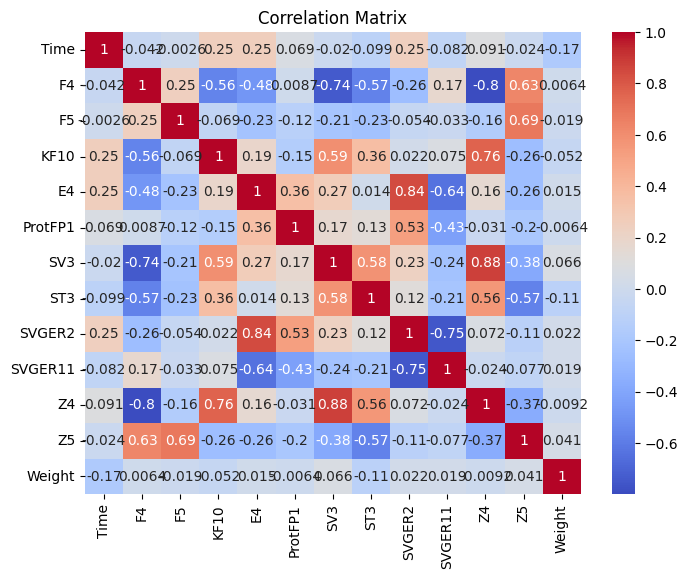

In [378]:

# Calculate the correlation matrix for the features in X_train
correlation_matrix = np.corrcoef(X_train, rowvar=False)

# Create a heatmap to visualize the correlation matrix, annotating values, and using the 'coolwarm' color map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=X.keys(), yticklabels=X.keys())

# Set the title for the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()